<a href="https://colab.research.google.com/github/ekqlsrla/ESAA-2/blob/main/SESSION/1205_Keras_CNN_Dog_or_Cat_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **| Keras CNN Dog or Cat Classification**

---
## 1. Import Library

In [59]:
import numpy as np
import pandas as pd 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os

---
## 2. Define Constants

In [60]:
FAST_RUN = False
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

---
## 3. Prepare Training Data

In [61]:
filenames = os.listdir('/content/drive/MyDrive/Colab Notebooks/ESAA-2/DATA/Keras CNN classification/train_700')
categories = []
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [62]:
df.head()

,filename,category
0,cat.106.jpg,0
1,cat.10.jpg,0
2,cat.101.jpg,0
3,cat.100.jpg,0
4,cat.1.jpg,0


### (1) See Total in count

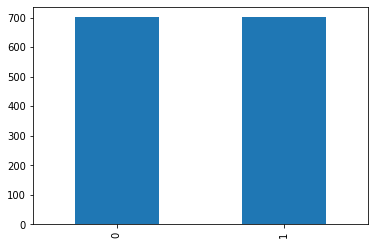

In [63]:
df['category'].value_counts().plot.bar()

---
## 4. See sample image

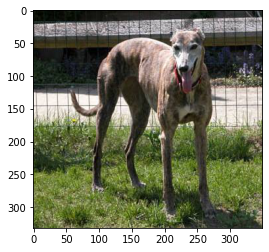

In [64]:
sample = random.choice(filenames)
image = load_img('/content/drive/MyDrive/Colab Notebooks/ESAA-2/DATA/Keras CNN classification/train_700/' + sample)
plt.imshow(image)

## 5. Build Model

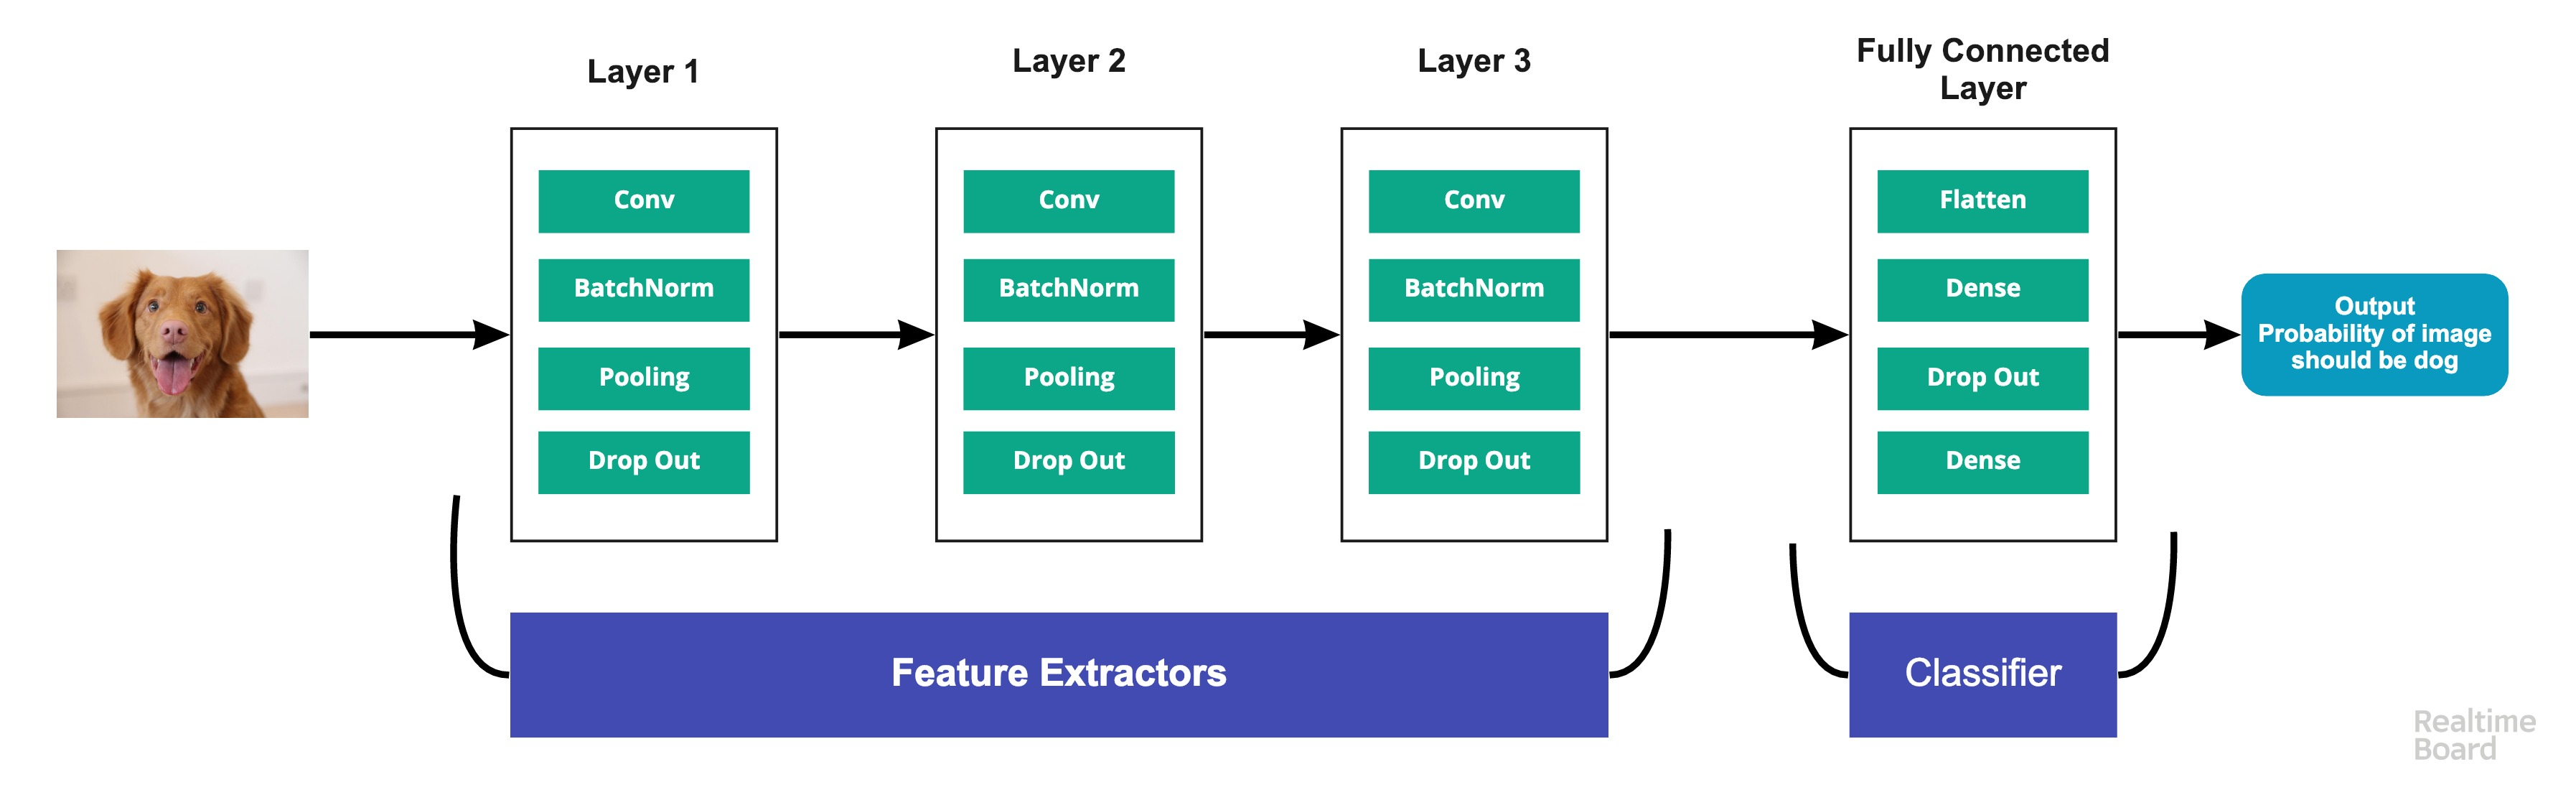

In [65]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_7 (Batc  (None, 126, 126, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 dropout_7 (Dropout)         (None, 63, 63, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_8 (Batc  (None, 61, 61, 64)      

---
## 6. Callbacks


In [66]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

### (1) Early Stop



In [67]:
earlystop = EarlyStopping(patience = 10)

### (2) Learning Rate Reduction

In [68]:
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',
                                            patience = 2,
                                            verbose = 1,
                                            factor = 0.5,
                                            min_lr = 0.00001)

callbacks = [earlystop,learning_rate_reduction]

---
## 7. Prepare data

In [69]:
df['category'] = df['category'].replace({0:'cat', 1:'dog'})

In [70]:
train_df, validate_df = train_test_split(df, test_size = 0.20, random_state = 42)
train_df = train_df.reset_index(drop = True)
validate_df = validate_df.reset_index(drop = True)


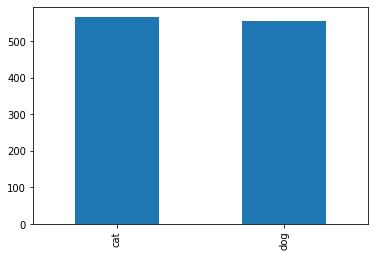

In [71]:

train_df['category'].value_counts().plot.bar()

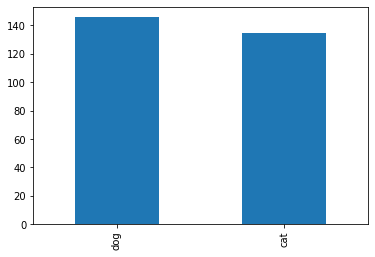

In [72]:
validate_df['category'].value_counts().plot.bar()

In [73]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size = 15

---
## 8. Training Generator

### (1) Train Generator

In [74]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    '/content/drive/MyDrive/Colab Notebooks/ESAA-2/DATA/Keras CNN classification/train_700/',
    x_col = 'filename',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = batch_size
)

Found 1121 validated image filenames belonging to 2 classes.


### (2) Validation Generator

In [75]:
validation_datagen = ImageDataGenerator(rescale = 1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df,
    '/content/drive/MyDrive/Colab Notebooks/ESAA-2/DATA/Keras CNN classification/train_700/',
    x_col = 'filename',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical',
    batch_size = batch_size
)

Found 281 validated image filenames belonging to 2 classes.


---

## 9. See how our generator work

In [76]:
example_df = train_df.sample(n = 1).reset_index(drop = True)
example_generator = train_datagen.flow_from_dataframe(
    example_df,
    '/content/drive/MyDrive/Colab Notebooks/ESAA-2/DATA/Keras CNN classification/train_700/',
    x_col = 'filename',
    y_col = 'category',
    target_size = IMAGE_SIZE,
    class_mode = 'categorical'
)

Found 1 validated image filenames belonging to 1 classes.


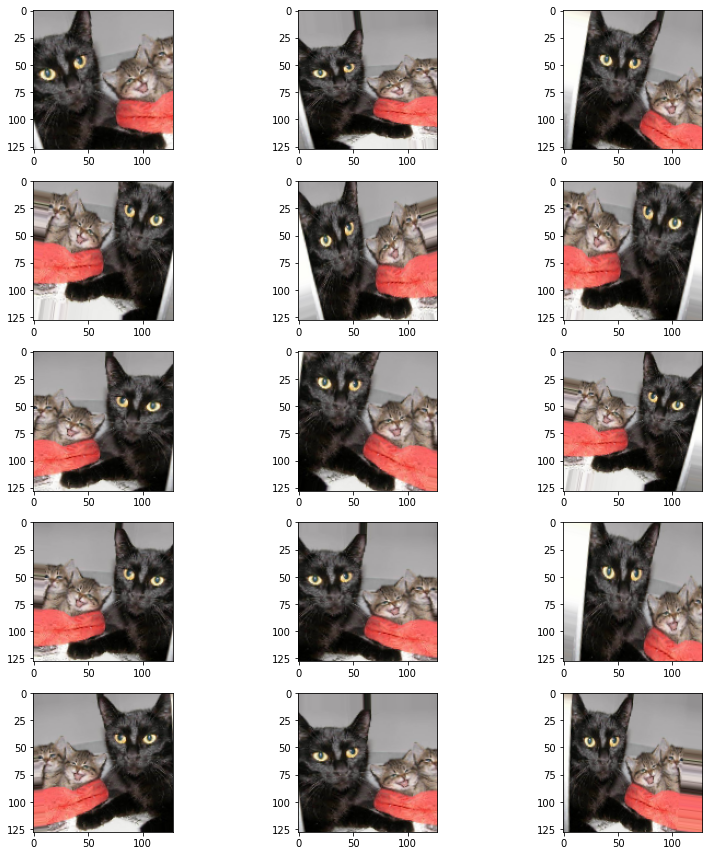

In [77]:
plt.figure(figsize = (12,12))
for i in range(0,15) :
  plt.subplot(5,3,i+1)
  for X_batch, Y_batch in example_generator :
    image = X_batch[0]
    plt.imshow(image)
    break
  
plt.tight_layout()
plt.show()

---
## 10. Fit Model

In [79]:
epochs= 15
history = model.fit_generator(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

<ipython-input-79-20938d296878>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/15
74/74 [==============================] - ETA: 0s - loss: 0.5274 - accuracy: 0.7351

74/74 [==============================] - 76s 1s/step - loss: 0.5274 - accuracy: 0.7351 - val_loss: 0.5951 - val_accuracy: 0.6926 - lr: 0.0010
Epoch 2/15
74/74 [==============================] - ETA: 0s - loss: 0.5209 - accuracy: 0.7541

74/74 [==============================] - 70s 940ms/step - loss: 0.5209 - accuracy: 0.7541 - val_loss: 0.6463 - val_accuracy: 0.6778 - lr: 0.0010
Epoch 3/15
74/74 [==============================] - ETA: 0s - loss: 0.5209 - accuracy: 0.7676

74/74 [==============================] - 70s 944ms/step - loss: 0.5209 - accuracy: 0.7676 - val_loss: 0.6546 - val_accuracy: 0.6481 - lr: 0.0010
Epoch 4/15
74/74 [==============================] - ETA: 0s - loss: 0.5123 - accuracy: 0.7577

74/74 [==============================] - 72s 968ms/step - loss: 0.5123 - accuracy: 0.7577 - val_loss: 0.6923 - val_accuracy: 0.6741 - lr: 0.0010
Epoch 5/15
74/74 [==============================] - ETA: 0s - loss: 0.5069 - accuracy: 0.7432

74/74 [==============================] - 69s 934ms/step - loss: 0.5069 - accuracy: 0.7432 - val_loss: 0.5993 - val_accuracy: 0.6926 - lr: 0.0010
Epoch 6/15
74/74 [==============================] - ETA: 0s - loss: 0.5057 - accuracy: 0.7649

74/74 [==============================] - 71s 964ms/step - loss: 0.5057 - accuracy: 0.7649 - val_loss: 0.5688 - val_accuracy: 0.7407 - lr: 0.0010
Epoch 7/15
74/74 [==============================] - ETA: 0s - loss: 0.4653 - accuracy: 0.7848

74/74 [==============================] - 72s 973ms/step - loss: 0.4653 - accuracy: 0.7848 - val_loss: 0.6454 - val_accuracy: 0.6852 - lr: 0.0010
Epoch 8/15
74/74 [==============================] - ETA: 0s - loss: 0.4783 - accuracy: 0.7758

74/74 [==============================] - 72s 974ms/step - loss: 0.4783 - accuracy: 0.7758 - val_loss: 0.6222 - val_accuracy: 0.7037 - lr: 0.0010
Epoch 9/15
74/74 [==============================] - ETA: 0s - loss: 0.4728 - accuracy: 0.7939

74/74 [==============================] - 71s 954ms/step - loss: 0.4728 - accuracy: 0.7939 - val_loss: 0.6485 - val_accuracy: 0.7111 - lr: 0.0010
Epoch 10/15
74/74 [==============================] - ETA: 0s - loss: 0.4720 - accuracy: 0.7685

74/74 [==============================] - 71s 958ms/step - loss: 0.4720 - accuracy: 0.7685 - val_loss: 0.6899 - val_accuracy: 0.6667 - lr: 0.0010
Epoch 11/15
74/74 [==============================] - ETA: 0s - loss: 0.4794 - accuracy: 0.7857

74/74 [==============================] - 71s 954ms/step - loss: 0.4794 - accuracy: 0.7857 - val_loss: 0.6962 - val_accuracy: 0.6370 - lr: 0.0010
Epoch 12/15
74/74 [==============================] - ETA: 0s - loss: 0.4258 - accuracy: 0.8110

74/74 [==============================] - 71s 958ms/step - loss: 0.4258 - accuracy: 0.8110 - val_loss: 0.8950 - val_accuracy: 0.6741 - lr: 0.0010
Epoch 13/15
74/74 [==============================] - ETA: 0s - loss: 0.4118 - accuracy: 0.8128

74/74 [==============================] - 69s 937ms/step - loss: 0.4118 - accuracy: 0.8128 - val_loss: 0.6561 - val_accuracy: 0.7037 - lr: 0.0010
Epoch 14/15
74/74 [==============================] - ETA: 0s - loss: 0.4676 - accuracy: 0.7857

74/74 [==============================] - 72s 969ms/step - loss: 0.4676 - accuracy: 0.7857 - val_loss: 0.6875 - val_accuracy: 0.6926 - lr: 0.0010
Epoch 15/15
74/74 [==============================] - ETA: 0s - loss: 0.4286 - accuracy: 0.8038

74/74 [==============================] - 69s 931ms/step - loss: 0.4286 - accuracy: 0.8038 - val_loss: 0.8475 - val_accuracy: 0.6630 - lr: 0.0010


---
## 10. Save Model

In [80]:
model.save_weights('model.h5')

---
## 11. Virtualize Training

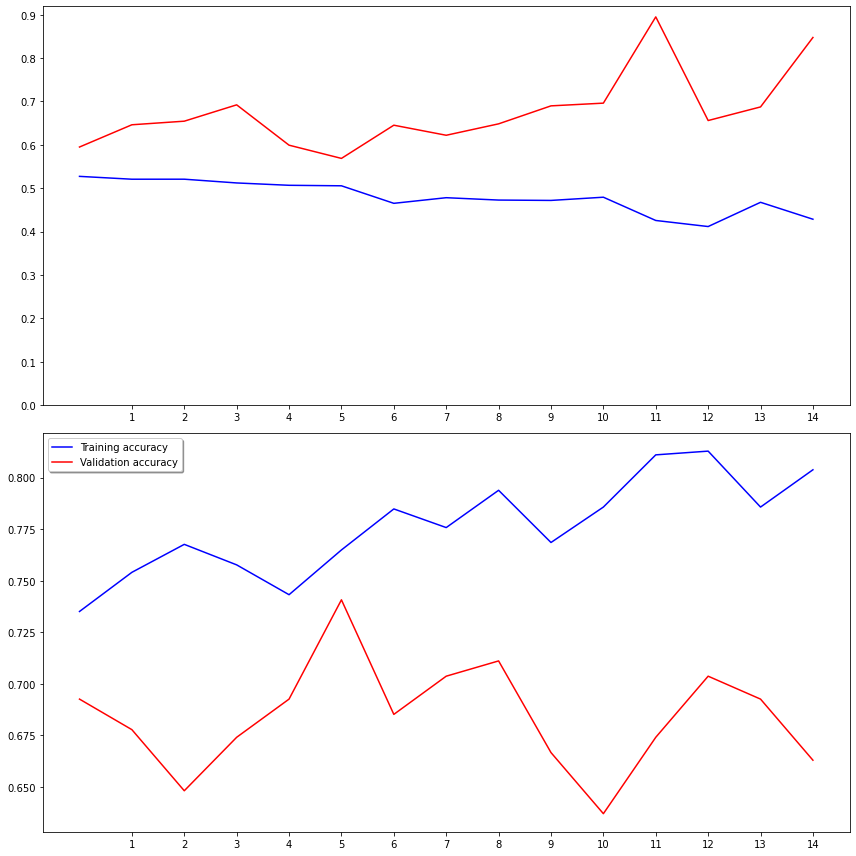

In [81]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize = (12,12))
ax1.plot(history.history['loss'], color= 'b', label = 'Training loss')
ax1.plot(history.history['val_loss'], color = 'r', label = 'validation loss')
ax1.set_xticks(np.arange(1,epochs, 1))
ax1.set_yticks(np.arange(0,1,0.1))

ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

---
## 12. Prepare Testing Data



In [82]:
test_filenames = os.listdir('/content/drive/MyDrive/Colab Notebooks/ESAA-2/DATA/Keras CNN classification/test_500')
test_df = pd.DataFrame({
    'filename' : test_filenames
})
nb_samples = test_df.shape[0]

---
## 13. Create Testing Generator



In [83]:
test_gen = ImageDataGenerator(rescale = 1./255)

test_generator = test_gen.flow_from_dataframe(
    test_df,
    '/content/drive/MyDrive/Colab Notebooks/ESAA-2/DATA/Keras CNN classification/test_500/',
    x_col = 'filename',
    y_col = None,
    class_mode = None,
    target_size = IMAGE_SIZE,
    batch_size = batch_size,
    shuffle = False
)

Found 510 validated image filenames.


---
## 14. Predict

In [84]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

<ipython-input-84-52619fd72ccc>:1: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))


In [85]:
test_df['category'] = np.argmax(predict, axis=-1)

In [86]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [87]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

### (1) Virtaulize Result

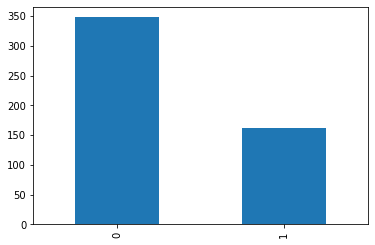

In [88]:
test_df['category'].value_counts().plot.bar()

### (2) See predicted result with images

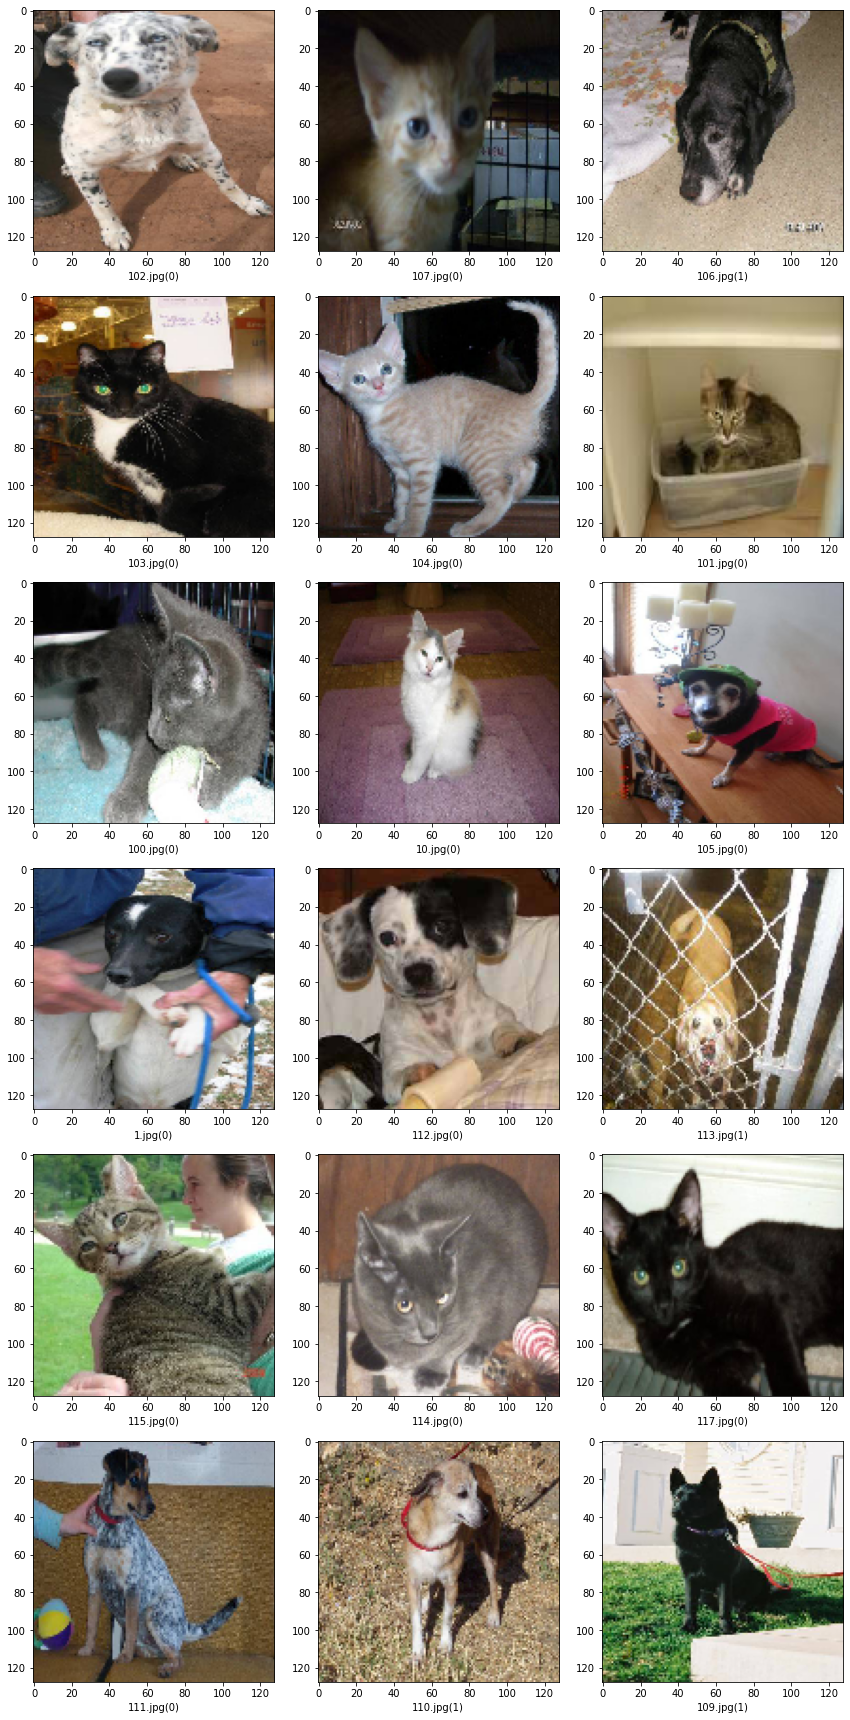

In [89]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("/content/drive/MyDrive/Colab Notebooks/ESAA-2/DATA/Keras CNN classification/test_500/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()